<a href="https://colab.research.google.com/github/Abhimokashe/Decision-Tree-classifier/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/car_evaluation.csv')

In [3]:
df1 = df.copy()

In [4]:
df1.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df1.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df1.shape

(1727, 7)

In [8]:
df1.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [9]:
df1.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

There is no need to treat missing values.

In [10]:
col_names = ['buying','maint','persons','doors','lug_boot','safety','class']

In [11]:
df1 = df1.set_axis(col_names,axis=1)

In [12]:
df1.columns

Index(['buying', 'maint', 'persons', 'doors', 'lug_boot', 'safety', 'class'], dtype='object')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   persons   1727 non-null   object
 3   doors     1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [14]:
df2 = df1.copy()

In [15]:
from sklearn import preprocessing


In [16]:
le = preprocessing.LabelEncoder()
df2['buying'] = le.fit_transform(df2['buying'])

In [17]:
df2['maint'] = le.fit_transform(df2['maint'])
df2['persons'] = le.fit_transform(df2['persons'])
df2['doors'] = le.fit_transform(df2['doors'])
df2['lug_boot'] = le.fit_transform(df2['lug_boot'])
df2['safety'] = le.fit_transform(df2['safety'])
df2['class'] = le.fit_transform(df2['class'])

In [18]:
df2.head()

,buying,maint,persons,doors,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [19]:
from sklearn.model_selection import train_test_split
X = df2.drop('class',axis=1)
y = df2['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
y_decT = classifier.fit(X_train,y_train)

In [21]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 2, 2, 0, 3, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 0, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 3, 2, 2, 0, 3, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 3, 2, 2, 2, 3, 1, 0, 3, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 3, 2, 2, 0, 3,
       2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 3,

AttributeError: ignored

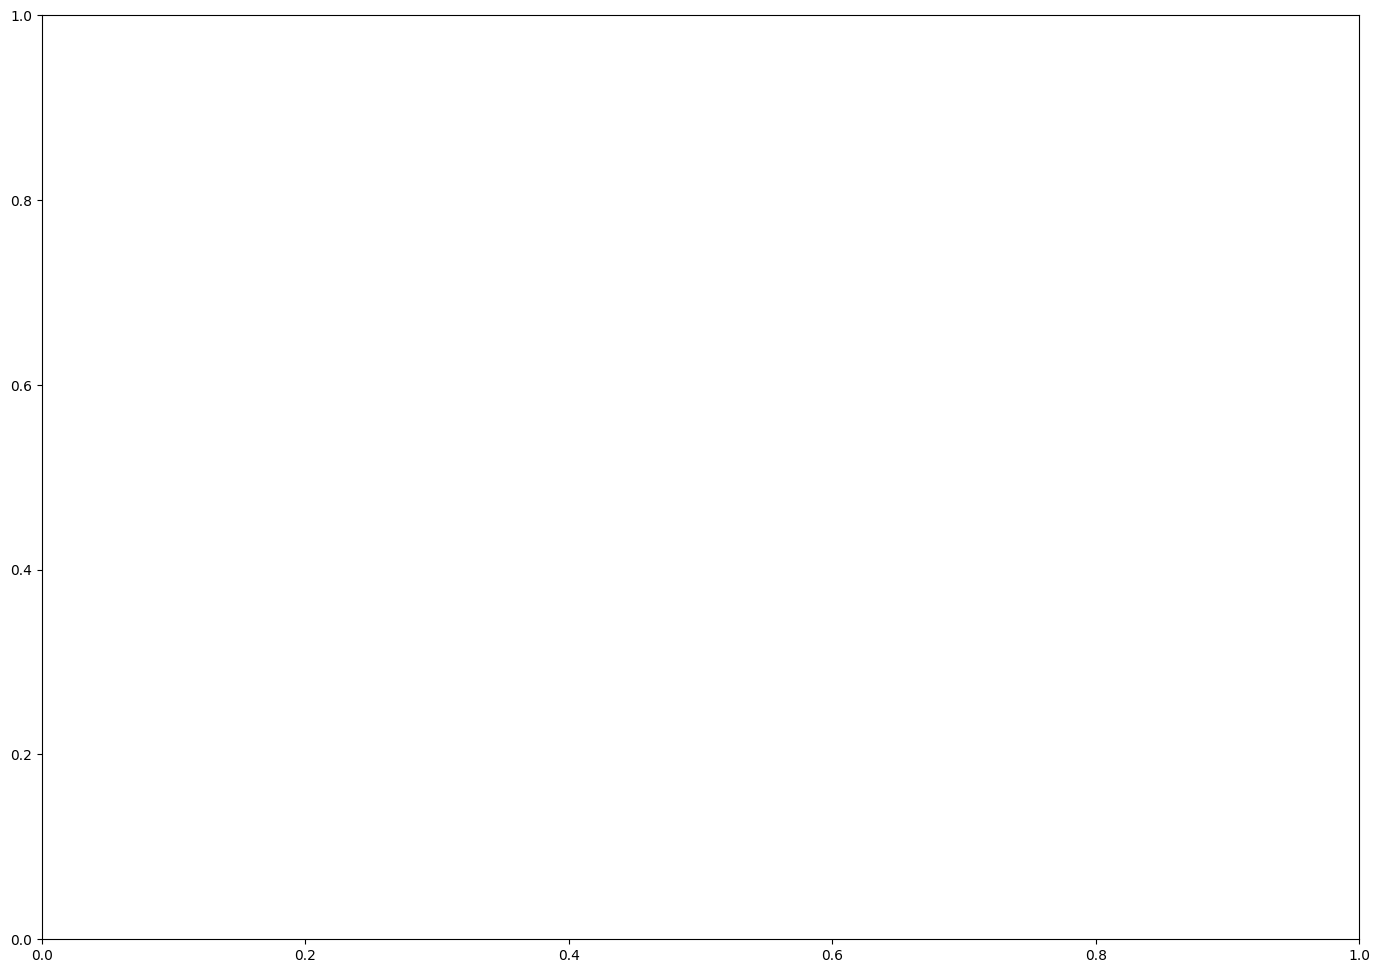

In [23]:
    plt.subplots(figsize=(17, 12))
    classifier.plot_tree(y_decT, feature_names=X.columns, filled=True, rounded=True, class_names=y.unique())